## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


1. Jakub Świstak
2. Nikita Kozlov
3. Jacek Zalewski

As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [2]:
# !pip uninstall scipy -y
# !conda uninstall nltk numpy -y
# !conda install nltk -y
# !pip install numpy==1.26.4 scipy wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 2.8 MB/s eta 0:00:00 0:00:01


In [3]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [4]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/nk2/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [7]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [8]:
df

,Tweet,Sentiment
0,Getting everything ready for my Natural Pefume...,1
1,"@ErisLovesMovies :( Feel better soon, Eris. #s...",0
2,@NAYAKHK 2)IndiraG wanted Judiciary to be comm...,1
3,@myeongwh0re thank you anshe :( idk i just can...,0
4,@natalielms95 @jxhun @SharonMelaniex why is t...,0
...,...,...
9995,@write2kill Ha ha :-) I guess I was being polite.,1
9996,Hope you will like it ;) #JabongatPumaUrbanSta...,1
9997,@lDreeriksenl happy birthday with chocolate l...,1
9998,@DanGodOfWar thank you! :),1


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [9]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [10]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
9298,#TDIF! We will be doing our #FF shoutouts shor...,1
9852,How am I gonna live without my bbygurl for two...,0
2030,@JessicaRyanFord I fell asleep :( do you guys ...,0
4707,@mcllary That might work :) Have a great weeke...,1
1605,@ASAPOFFICIAL we love you Liza!:)😘,1
...,...,...
5127,"""Keep smiling because life is a beautiful thin...",1
3369,Current playlist :D http://t.co/PYKQLD4KHr,1
6812,@sakuraflower20 why you're upset? Is that some...,0
7151,we just face timing :) http://t.co/UoqAstlhxO,1


In [11]:
test

,Tweet,Sentiment
2401,@stylesrose94 thanks :),1
6096,@KaReeMLSheNawY it is not even a real word :D,1
1218,"""That's a different department :D This is the ...",1
1883,@XxJenniferAmyxX Derek likes to tour &amp; vis...,0
1463,The finale of Parasyte fucked my feelings alll...,0
...,...,...
7283,@rivverofhoney Omg no way?! not you guys aswel...,0
2403,@josephcaptures sure! go cuss out some teenage...,1
2212,@jaredNOTsubway @iluvmariah @Bravotv Then that...,1
4706,"Quit it :)""@_uNeo: You selling it too @Dented_...",1


Positive words


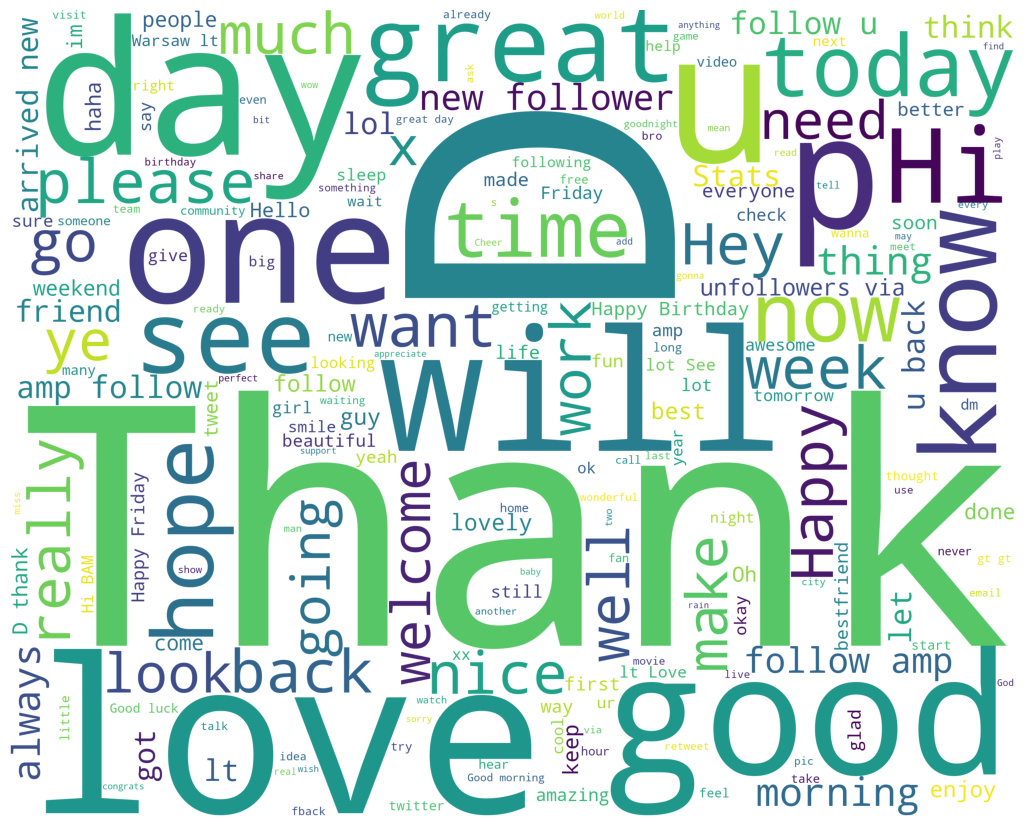

Negative words


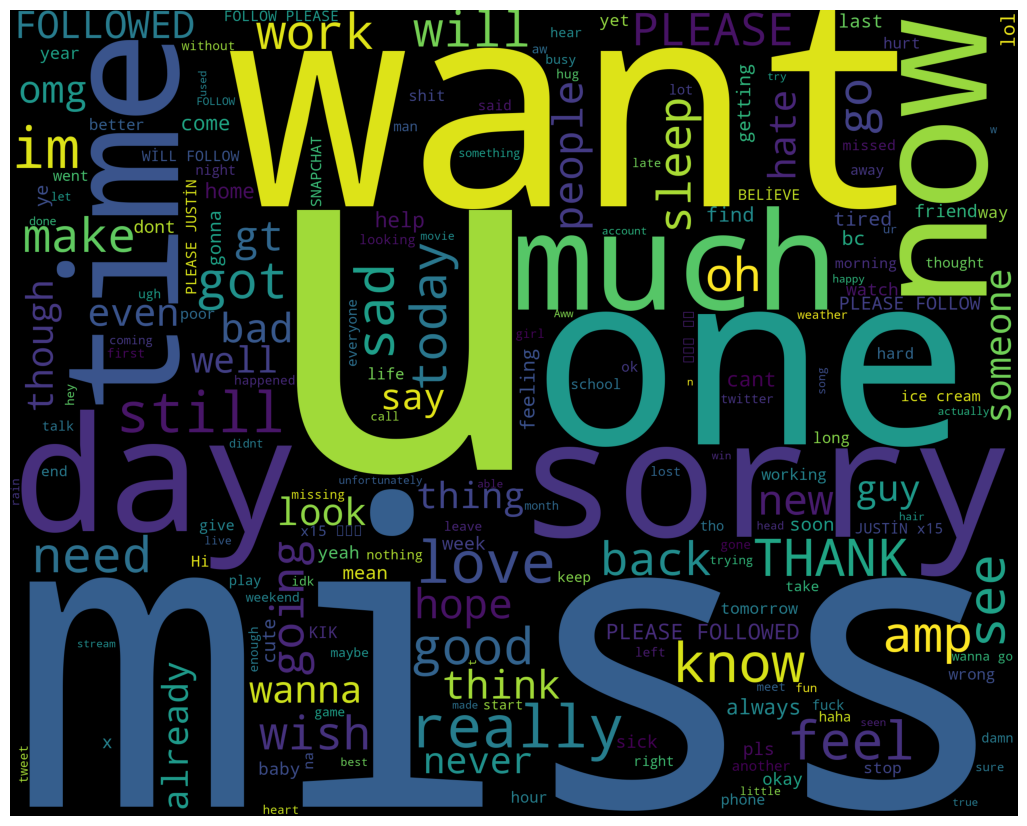

In [12]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nk2/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [15]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

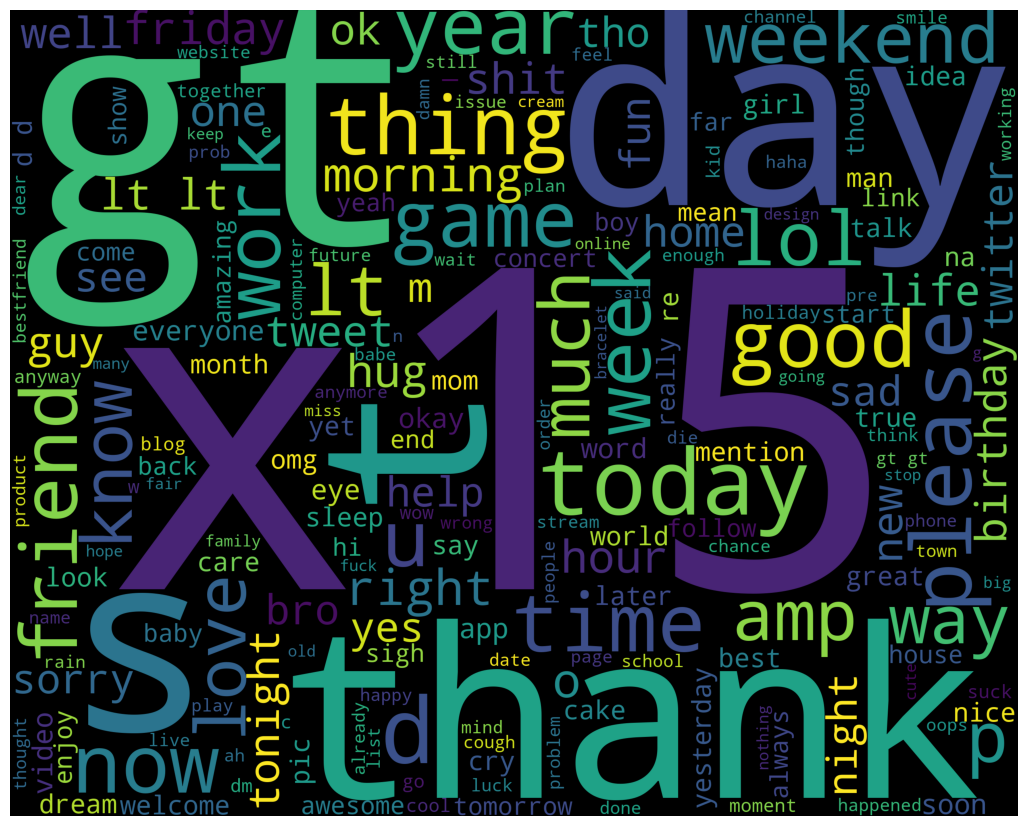

In [16]:
wordcloud_draw(w_features)

In [50]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

KeyboardInterrupt: 

In [19]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if res == 0:
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if res == 1:
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 513/441 
[Positive]: 487/341 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [20]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[441  72]
 [146 341]]


In [ ]:
#measure F1 score, and recall, and precision
#build other model, e.g. random forest for this task

In [21]:
# prompt: measure F1 score, and recall, and precision

from sklearn.metrics import f1_score, recall_score, precision_score

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)


F1 Score: 0.780370505050505
Recall: 0.782
Precision: 0.7875047250557891


In [22]:
# prompt: add another metric for assesing the model

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.782


In [23]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.758
F1 Score: 0.757743857848483
Recall: 0.758
Precision: 0.7582237363079087
Confusion Matrix:
 [[403 110]
 [132 355]]


In [95]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:\n", cm)


Accuracy: 0.624
F1 Score: 0.5885206871227494
Recall: 0.624
Precision: 0.7054151863782788
Confusion Matrix:
 [[171 342]
 [ 34 453]]


In [25]:
# prompt: add sentiment analysis with Vader library

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00 0:00:01
                                                  Tweet  \
9298  #TDIF! We will be doing our #FF shoutouts shor...   
9852  How am I gonna live without my bbygurl for two...   
2030  @JessicaRyanFord I fell asleep :( do you guys ...   
4707  @mcllary That might work :) Have a great weeke...   
1605                 @ASAPOFFICIAL we love you Liza!:)😘   
...                                                 ...   
5127  "Keep smiling because life is a beautiful thin...   
3369         Current playlist :D http://t.co/PYKQLD4KHr   
6812  @sakuraflower20 why you're upset? Is that some...   
7151      we just face timing :) http://t.co/UoqAstlhxO   
4972  @oIiverfelicitys UGH YUCK :( make sure you res...   

                                       Sentiment Scores  Compound Score  \
9298  {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...          0.7494   
9852  {'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp.

In [114]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# predict sentiment using tfidf matrix
models = [
    # CategoricalNB(),
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(random_state=0),
    SVC(kernel='rbf'),
    XGBClassifier(),
    Perceptron(),
]


In [115]:
# TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train['Tweet'])

for model in models:
    model.fit(tfidf_matrix, train['Sentiment'])
    y_pred = model.predict(vectorizer.transform(test['Tweet']))
    
    accuracy = accuracy_score(test['Sentiment'], y_pred)
    f1 = f1_score(test['Sentiment'], y_pred, average='weighted')
    recall = recall_score(test['Sentiment'], y_pred, average='weighted')
    precision = precision_score(test['Sentiment'], y_pred, average='weighted')
    cm = confusion_matrix(test['Sentiment'], y_pred)
    

    print(f"Model: {model}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Confusion Matrix:\n", cm)
    print("\n")

Model: LogisticRegression(max_iter=1000)
Accuracy: 0.756
F1 Score: 0.7559863252790188
Recall: 0.756
Precision: 0.7559787008307477
Confusion Matrix:
 [[392 121]
 [123 364]]


Model: RandomForestClassifier(random_state=0)
Accuracy: 0.729
F1 Score: 0.7283657817879161
Recall: 0.729
Precision: 0.72974
Confusion Matrix:
 [[396 117]
 [154 333]]


Model: SVC()
Accuracy: 0.768
F1 Score: 0.7678438204993608
Recall: 0.768
Precision: 0.7680816827808749
Confusion Matrix:
 [[405 108]
 [124 363]]


Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_del

In [116]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(train['Tweet'])

# Bag of words
for model in models:
    model.fit(bow_matrix, train['Sentiment'])
    y_pred = model.predict(vectorizer.transform(test['Tweet']))
    accuracy = accuracy_score(test['Sentiment'], y_pred)
    f1 = f1_score(test['Sentiment'], y_pred, average='weighted')
    recall = recall_score(test['Sentiment'], y_pred, average='weighted')
    precision = precision_score(test['Sentiment'], y_pred, average='weighted')
    cm = confusion_matrix(test['Sentiment'], y_pred)
    print(f"Model: {model}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Confusion Matrix:\n", cm)
    print("\n")

Model: LogisticRegression(max_iter=1000)
Accuracy: 0.758
F1 Score: 0.757743857848483
Recall: 0.758
Precision: 0.7582237363079087
Confusion Matrix:
 [[403 110]
 [132 355]]


Model: RandomForestClassifier(random_state=0)
Accuracy: 0.743
F1 Score: 0.7415474957135471
Recall: 0.743
Precision: 0.7460872641509434
Confusion Matrix:
 [[416  97]
 [160 327]]


Model: SVC()
Accuracy: 0.767
F1 Score: 0.7658230011835513
Recall: 0.767
Precision: 0.770066449905235
Confusion Matrix:
 [[426  87]
 [146 341]]


Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
            

In [113]:
# NGram
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
ngram_matrix = vectorizer.fit_transform(train['Tweet'])

# NGram
for model in models:
    try:
        model.fit(ngram_matrix, train['Sentiment'])
        y_pred = model.predict(vectorizer.transform(test['Tweet']))
    
        accuracy = accuracy_score(test['Sentiment'], y_pred)
        f1 = f1_score(test['Sentiment'], y_pred, average='weighted')
        recall = recall_score(test['Sentiment'], y_pred, average='weighted')
        precision = precision_score(test['Sentiment'], y_pred, average='weighted')
        cm = confusion_matrix(test['Sentiment'], y_pred)
        print(f"Model: {model}")
        print("Accuracy:", accuracy)
        print("F1 Score:", f1)
        print("Recall:", recall)
        print("Precision:", precision)
        print("Confusion Matrix:\n", cm)
        print("\n")
    except:
        print(f"Model: {model} failed")

Model: LogisticRegression(max_iter=1000)
Accuracy: 0.767
F1 Score: 0.7666272373931142
Recall: 0.767
Precision: 0.7675507098084082
Confusion Matrix:
 [[411 102]
 [131 356]]


Model: RandomForestClassifier(random_state=0)
Accuracy: 0.747
F1 Score: 0.7448779696150054
Recall: 0.747
Precision: 0.752306438791733
Confusion Matrix:
 [[426  87]
 [166 321]]


Model: SVC()
Accuracy: 0.743
F1 Score: 0.7386103694447762
Recall: 0.743
Precision: 0.7555934362934363
Confusion Matrix:
 [[443  70]
 [187 300]]


Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
           

In [133]:
# Text statistics
from textblob import TextBlob

df['TextBlob Sentiment'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TextBlob Sentiment'] = df['TextBlob Sentiment'].apply(lambda x: 0 if x < 0 else 1)

print('Model: TextBlob')

accuracy = accuracy_score(df['Sentiment'], df['TextBlob Sentiment'])
print("Accuracy:", accuracy)

# f1
f1 = f1_score(df['Sentiment'], df['TextBlob Sentiment'], average='weighted')
print("F1 Score:", f1)


Model: TextBlob
Accuracy: 0.9675
F1 Score: 0.9674873821781496
